# **Integrantes do grupo**

- Daniel Faria de Barros RA:94026
- Tabatha Larissa        RA:93045
- Gustavo Jordão Santos  RA:93821




# Importação de bibliotecas

Importação de todas as bibliotecas utilizadas em todos os processos.

In [38]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
!pip install seaborn
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Data Mining**


Lendo todos os datasets que serão utilizados no trabalho.

In [39]:
imoveis = pd.read_csv('https://tinyurl.com/alugueis-sp-df') 
imoveis_amostra = pd.read_excel("amostra.xlsx")
imoveis_amostra.to_csv("imoveis_amostra1.csv")
imoveis_amostra_final = pd.read_csv("imoveis_amostra1.csv")

Visualizaçao do dataset principal

In [40]:
imoveis.head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


Visualização do dataset QuintoAndar

In [41]:
imoveis_amostra_final

,Unnamed: 0,Unnamed: 0.1,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
0,0,1.0,700000.0,500.0,90.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment
1,1,2.0,420000.0,1650.0,200.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,Belém/São Paulo,sale,apartment
2,2,3.0,1288000.0,779.0,70.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment
3,3,4.0,490000.0,805.0,110.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,Barra Funda/São Paulo,sale,apartment
4,4,5.0,390000.0,545.0,24.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vila Madalena/São Paulo,NaN,NaN
6308,6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belém/São Paulo,NaN,NaN
6309,6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vila Madalena/São Paulo,NaN,NaN
6310,6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barra Funda/São Paulo,NaN,NaN


In [42]:
imoveis.shape

(13640, 16)

In [43]:
imoveis.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [44]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Utilizando o filtro para usar apenas apartamentos que estão á venda, como o proposto no exercício.

In [45]:
imoveis = imoveis[imoveis["Negotiation Type"] == "sale"]

In [46]:
# Print para ver como ficou
imoveis

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


#**Data Cleaning**

In [47]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 4901 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6412 non-null   int64  
 1   Condo             6412 non-null   int64  
 2   Size              6412 non-null   int64  
 3   Rooms             6412 non-null   int64  
 4   Toilets           6412 non-null   int64  
 5   Suites            6412 non-null   int64  
 6   Parking           6412 non-null   int64  
 7   Elevator          6412 non-null   int64  
 8   Furnished         6412 non-null   int64  
 9   Swimming Pool     6412 non-null   int64  
 10  New               6412 non-null   int64  
 11  District          6412 non-null   object 
 12  Negotiation Type  6412 non-null   object 
 13  Property Type     6412 non-null   object 
 14  Latitude          6412 non-null   float64
 15  Longitude         6412 non-null   float64
dtypes: float64(2), int64(11), object(3)
me

Limpeza de possiveis dados duplicados e faltantes.

- o .fillna foi utilizado para substituir os dados nulos do dataset de validação por 0

In [48]:
# Retirando dados duplicados

imoveis.drop_duplicates(inplace=True)
imoveis_amostra_final.drop_duplicates(inplace=True)

# Retirando dados faltantes
imoveis.dropna(inplace=True)

# Modificando valores nulos para valores 0
imoveis_amostra_final.fillna(value=0,inplace=True)

In [49]:
#Print
imoveis

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [50]:
imoveis_amostra_final

,Unnamed: 0,Unnamed: 0.1,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
0,0,1.0,700000.0,500.0,90.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment
1,1,2.0,420000.0,1650.0,200.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,Belém/São Paulo,sale,apartment
2,2,3.0,1288000.0,779.0,70.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment
3,3,4.0,490000.0,805.0,110.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,Barra Funda/São Paulo,sale,apartment
4,4,5.0,390000.0,545.0,24.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,6307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vila Madalena/São Paulo,0,0
6308,6308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Belém/São Paulo,0,0
6309,6309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vila Madalena/São Paulo,0,0
6310,6310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barra Funda/São Paulo,0,0


#**Data Exploration**

- Alguns graficos apenas para ter ideia de como so dados estao distribuidos.

- Um destaque para o grafico de preços por distrito.


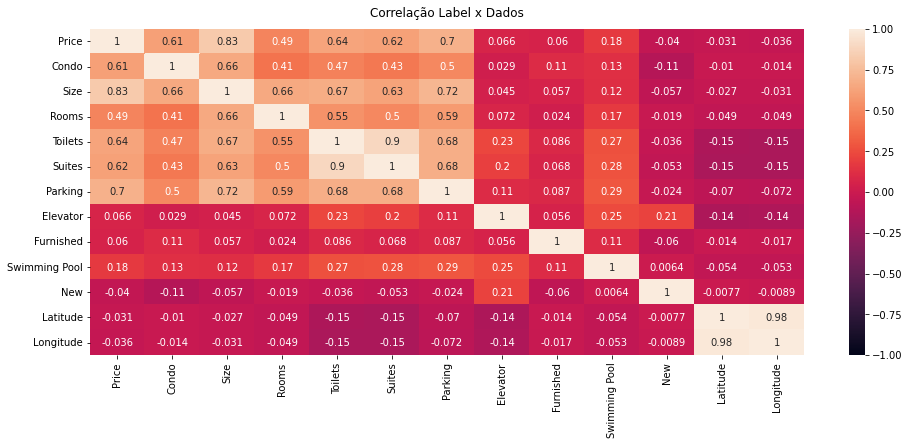

In [51]:
imoveisgraph = imoveis.corr()
plt.figure(figsize = (16,6))
heatmap = sns.heatmap(imoveisgraph,vmin = -1, vmax = 1, annot = True)
heatmap.set_title("Correlação Label x Dados", fontdict ={"fontsize":12}, pad=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


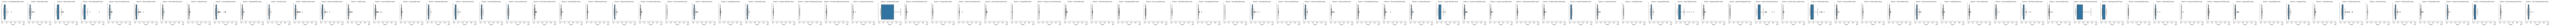

In [52]:
# Grafico BoxPlot de precos por cada distrito

graph = sns.FacetGrid(imoveis, col = "District")
#graph.set_titles("Preços de Apartamentos por distrito")
graph.map(sns.boxplot, "Price")
graph.add_legend()

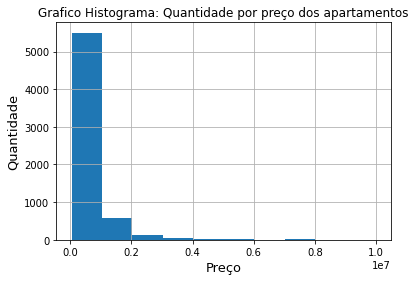

In [53]:
imoveis.hist(column= "Price",bins = 10)
plt.title("Grafico Histograma: Quantidade por preço dos apartamentos")
plt.ylabel("Quantidade", fontsize=13)
plt.xlabel("Preço", fontsize=13)
plt.show;

Pegando a quantidade de casas novas e antigas, aqui já da para ter um noçao que há uma quantidade maior de apartamentos antigos.

In [54]:
imoveis.New.value_counts()

0    6106
1     196
Name: New, dtype: int64

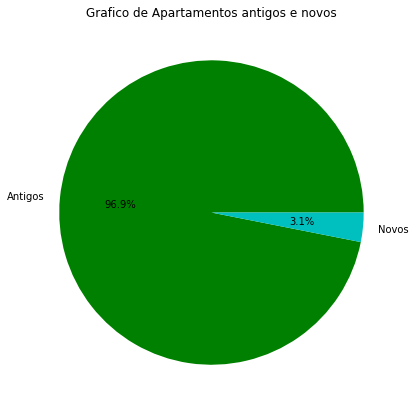

In [55]:
new = imoveis[imoveis.New==1].count()
new = new["New"]
old = imoveis[imoveis.New==0].count()
old = old["New"]

coluna = ("Antigos","Novos")
quantidade = (old,new)

fig,pizzahut = plt.subplots(figsize=(7,7))
pizzahut.set_title("Grafico de Apartamentos antigos e novos")
pizzahut.pie(autopct="%1.1f%%",x=quantidade, labels=coluna,colors=('g','c'),textprops={'fontsize': 10});

#**Feature Engineering**

Aqui comecei com um dummies para separar a coluna distritos em varias,com cada coluna com um distrito diferente.

- Fiz o mesmo para o dataset de validação externa, para deixa-lo identico ao principal, evitando possiveis erros.

- o final2.head(5) foi utilizado para remover o excessivo numero de linhas que veio no dataset de validação.

In [56]:
imoveisaux = pd.get_dummies(imoveis, columns = ['District'])
amostraaux = pd.get_dummies(imoveis_amostra_final, columns = ["District"])

#final = pd.concat( [ imoveisaux ], axis=1 )
final = imoveisaux
final2 = amostraaux
final2 = final2.head(5)

In [57]:
final2

,Unnamed: 0,Unnamed: 0.1,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,...,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
0,0,1.0,700000.0,500.0,90.0,2.0,2.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,1,2.0,420000.0,1650.0,200.0,2.0,2.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,1288000.0,779.0,70.0,1.0,2.0,1.0,2.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,3,4.0,490000.0,805.0,110.0,2.0,3.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,5.0,390000.0,545.0,24.0,1.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
final2

,Unnamed: 0,Unnamed: 0.1,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,...,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
0,0,1.0,700000.0,500.0,90.0,2.0,2.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,1,2.0,420000.0,1650.0,200.0,2.0,2.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,1288000.0,779.0,70.0,1.0,2.0,1.0,2.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,3,4.0,490000.0,805.0,110.0,2.0,3.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,5.0,390000.0,545.0,24.0,1.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


Checagem para averiguar se há valores em string 

In [59]:
# Verificando se ainda há valores string no dataset
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 4901 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6302 non-null   int64  
 1   Condo             6302 non-null   int64  
 2   Size              6302 non-null   int64  
 3   Rooms             6302 non-null   int64  
 4   Toilets           6302 non-null   int64  
 5   Suites            6302 non-null   int64  
 6   Parking           6302 non-null   int64  
 7   Elevator          6302 non-null   int64  
 8   Furnished         6302 non-null   int64  
 9   Swimming Pool     6302 non-null   int64  
 10  New               6302 non-null   int64  
 11  District          6302 non-null   object 
 12  Negotiation Type  6302 non-null   object 
 13  Property Type     6302 non-null   object 
 14  Latitude          6302 non-null   float64
 15  Longitude         6302 non-null   float64
dtypes: float64(2), int64(11), object(3)
me

In [60]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Columns: 111 entries, Unnamed: 0 to District_Água Rasa/São Paulo
dtypes: float64(12), int64(1), object(2), uint8(96)
memory usage: 1.1+ KB


Mais uma vez dropando colunas que possam causar problemas na hora do treinamento do modelo, principalmente por conterem valores em "string", com excessão das colunas "Latidude" e "Longitude" que foram retiradas para evitar erros com o dataset de validação pois o mesmo nao tinha essas duas colunas.

- Dropei a coluna price do dataset de validação para o modelo não "colar" a resposta final pois o que nós queremos que ele advinhe o valor do apartamento.

In [61]:
final.drop(columns = ["Negotiation Type" , "Property Type","Latitude","Longitude"],inplace=True)
final2.drop(columns= ["Price","Negotiation Type", "Property Type"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Aqui eu percebi que o dataset de validação veio com essas duas colunas super estranhas kkk. entao dropei elas para nao ter problemas no futuro.

- não haviam dados nas mesmas

In [62]:
final2.drop(columns = ["Unnamed: 0","Unnamed: 0.1"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
final2

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,...,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
0,500.0,90.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1650.0,200.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,779.0,70.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,805.0,110.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,545.0,24.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


Separação do label dos dados

- E repetindo o processo com o dataset de validação

- Decidi optar por fazer uma divisão 70/30 pois achei que o dataset continha uma quantidade razoavel de dados.

- 70 % dados de treino
- 30 % dados de teste

In [64]:
X_amostra = final2
X = final.drop(columns=["Price"])
Y = final["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Nessa parte do codigo setei o scaler para os dados.

- Optei por usar o StandardScaler pois testei com o minmax antes e ele nao me retornou um resultado agradavel.

In [65]:
scaler = StandardScaler()

# sempre priorizando o "escalamento" dos dados de entrada

# aplicando o fit nos dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# fazendo o mesmo nos dados de teste
X_test_scaled = scaler.transform(X_test)

#Scaler nos dados da amostra
X_scaled_amostra = scaler.transform(X_amostra)

In [66]:
# Visualizando os dados de treino escalados
X_train_scaled

array([[-0.54516676, -0.76254363, -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [-0.86306716, -0.54807934, -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [ 1.28276055,  1.98649864,  0.95302479, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       ...,
       [-0.735907  , -0.91851766, -1.86925943, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [-0.86306716, -0.72355012, -1.86925943, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [-0.62464186, -0.6065696 , -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ]])

In [67]:
# Visualizando os dados de teste escalados
X_test_scaled

array([[-0.86306716, -0.78204038, -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [-0.41323809, -0.56757609, -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [-0.86306716, -0.62606635, -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       ...,
       [ 0.88538505,  0.13430704,  0.95302479, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [ 0.17010915, -0.15814426,  0.95302479, ..., -0.12133753,
        -0.07079923, -0.1144177 ],
       [-0.86306716, -0.56757609, -0.45811732, ..., -0.12133753,
        -0.07079923, -0.1144177 ]])

In [68]:
# Visualizando os dados da amostra escalados

X_scaled_amostra

array([[-6.83161546e-02,  2.12294055e-01, -4.58117320e-01,
        -4.17130604e-02,  8.76020635e-02, -1.75712092e+00,
         1.19539314e+00, -3.64772994e-01, -1.08548220e+00,
        -1.82381631e-01, -1.31518242e-01, -8.13509844e-02,
        -1.10279382e-01, -1.19399124e-01, -1.34169239e-01,
        -1.41845899e-01, -1.35909840e-01, -1.52303887e-01,
        -7.07992325e-02, -1.44320864e-01, -1.38482667e-01,
        -6.74890445e-02, -7.23986734e-02, -1.20372008e-01,
        -9.19732372e-02, -1.03778301e-01, -1.03778301e-01,
        -1.15430257e-01, -8.54845277e-02, -1.13396574e-01,
        -1.48361455e-01, -1.14417701e-01, -9.32184891e-02,
        -1.12366644e-01, -1.04888533e-01, -1.29722902e-01,
        -9.56620300e-02, -1.05987637e-01, -6.40111531e-02,
        -7.07992325e-02, -1.08153815e-01, -5.00000000e-02,
        -9.80468449e-02, -1.13396574e-01, -7.70019769e-02,
        -1.14417701e-01, -1.05987637e-01, -8.13509844e-02,
        -4.52164264e-02, -7.54980424e-02, -1.16434468e-0

#**Predictive modeling**

- Optei por fazer uma função que treinasse os 4 modelos de ML de uma vez, sem ficar fazendo códigos separados para cada um.

In [69]:
from sklearn import model_selection

def treinamodelos (X_train, X_test, y_train, y_test ):
  
  # Desenvolvi um tupla que pega todos os modelos necessarios que no caso são (4) e os treina de uma vez por meio da funçao utilziando um "for"
  models = [
          ('1', MLPRegressor(random_state=1,
                             solver = "adam",
                         hidden_layer_sizes= (70,3),
                          learning_rate_init=0.009,
                        max_iter=10000)),
            
           
          ('2', MLPRegressor(random_state=1,
                             solver = "lbfgs",
                             activation = "logistic",
                             hidden_layer_sizes= (40),
                            # learning_rate_init=0.010, 
                             max_iter=8000)),
            
           
          ('3', MLPRegressor(random_state=1,
                             solver = "sgd",
                         hidden_layer_sizes= (70,35),
                         learning_rate = "constant",
                         learning_rate_init=1, 
                        max_iter=10000)),
            
           
          ('4', MLPRegressor(random_state=1,
                         hidden_layer_sizes= (70,3), 
                        max_iter=9000)), 
            
        ]

  results = []

  # da um "fit" em cada modelo e imprime o resultado das metricas de cada modelo separadamente.
  for name, model in models:
    

    model.fit(X_train, y_train)
    
    y_pred_amostra = model.predict(X_scaled_amostra)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
  # imprime os resultados na tela do usuario
    print(f"Modelo {name}: usando {model}\t\033[93mr2_score: {r2:.4f}\033[39m")
    print(f"Modelo {name}: usando {model}\t\033[92mmean_absolute_error: {mae:.4f}\033[39m")
    print("Predição de valor do primeiro apartamento da amostra externa: {:.2f}\n".format(y_pred_amostra[0]))
    print("-----------------------------------------------------------------------\n")

    results.append ((name,r2,mae))
  return results

  # Conclusao sobre o treinamento dos modelos.
---
- A conclusão principal foi que o modelo 4 com os parametros padrões usando o solver "adam" teve uma taxa maior de sucesso, apresentando um R2 SCORE de 0.8927.
- Quanto mais eu alterava os parametros do corpo do modelo, menor era a taxa de acerto dele.
---
- Modelo 1 - mesmo mudando os parametros mas mantendo osolver "adams" eel obteve um resultado agradavel de metrica com um R2 SCORE de 0.8761

- Modelo 2 - mudando o solver para "lbfgs" e mudando/adicionando parametros novos, o resultado piorou levando o R2 SCORE para um valor baixo de 0.4878.

- Modelo 3 - agora usando "sgd" ele melhorou o resultado se comparado com o modelo 2, porém o R2 SCORE continua negativo.

- Modelo 4 - usando todos os valores padroes, solver "adams", eu obtive o meu melhor resultado de R2 SCORE com um valor de 0.8927, mesmo colocando o numero de iterações menores que o modelo 3. Um relato importante sobre esse modelo foi que por mais que ele use os parametros padroes, e tenha um numero de iterações mais baixo que os outros, ele foi o modelo que mais demorou para ser treinado.
---
Um fato curioso é que o modelo com o R2 SCORE mais alto, que nesse caso é o modelo 4, não obteve o melhor resultado na hora de chutar um valor para os apartamentos de validação. E os "piores" modelos obtiveram um resultado melhor, e o modelo que mais se aproximou do valor certo foi o modelo 1 que chutou RS 642592.36, sendo o valor correto de RS 700000

OBS: Abaixo segue o codigo para rodar os treinamentos.

- Amarelo = valores do R2 SCORE
- Verde = valores do mean_absolute_error

divirta-se :D

In [70]:
teste=treinamodelos(X_train_scaled, X_test_scaled, y_train, y_test)

Modelo 1: usando MLPRegressor(hidden_layer_sizes=(70, 3), learning_rate_init=0.009,
             max_iter=10000, random_state=1)	r2_score: 0.8761
Modelo 1: usando MLPRegressor(hidden_layer_sizes=(70, 3), learning_rate_init=0.009,
             max_iter=10000, random_state=1)	mean_absolute_error: 120509.3727
Predição de valor do primeiro apartamento da amostra externa: 642592.36

-----------------------------------------------------------------------

Modelo 2: usando MLPRegressor(activation='logistic', hidden_layer_sizes=40, max_iter=8000,
             random_state=1, solver='lbfgs')	r2_score: 0.4878
Modelo 2: usando MLPRegressor(activation='logistic', hidden_layer_sizes=40, max_iter=8000,
             random_state=1, solver='lbfgs')	mean_absolute_error: 295168.1202
Predição de valor do primeiro apartamento da amostra externa: 502768.29

-----------------------------------------------------------------------

Modelo 3: usando MLPRegressor(hidden_layer_sizes=(70, 35), learning_rate_init=

Valor do primeiro apartamento do dataset de validação

In [71]:
imoveis_amostra_final.head(1)

,Unnamed: 0,Unnamed: 0.1,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
0,0,1.0,700000.0,500.0,90.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,Vila Madalena/São Paulo,sale,apartment


In [72]:
# norm = MinMaxScaler()

# X_train_norm = norm.fit_transform(X_train)
# X_test_norm = norm.transform(X_test)

#**Data visualization**

In [73]:
for name,r2,mae in teste:
  print(f"modelo{name}:r2={r2},mae={mae}")

modelo1:r2=0.8760950441758989,mae=120509.37270777138
modelo2:r2=0.4877747933024087,mae=295168.1202119451
modelo3:r2=-0.05625240046594371,mae=351042.52782068175
modelo4:r2=0.8926694327743095,mae=115687.15821803336
